How to treat outliers
- Trimming
  - thin
  - fast
- Capping
- Winsorization
- Missing value
- Discretization

How to detect outliers in normal distribution
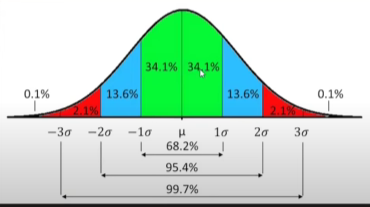

Normal distribution
- z-score treatment
    - mean - 3 * std
    - mean + 3 * std

Skewed distribution
- IQR Based Filtering
    - Q1 - 1.5*IQR
    - Q3 + 1.5*IQR

Other distributions
- Percentile based
- Winserization

## Z- Score Treatment

z- score: 

xii = xi - mean / std

if xii value is within -3 and 3 then its not a outlier

then use:
- trimming
-  Capping

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


c:\Users\shani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shani\AppData\Local\Temp\ipykernel_23496\3895637969.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'], ax=ax[0])
c:\Users\shani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

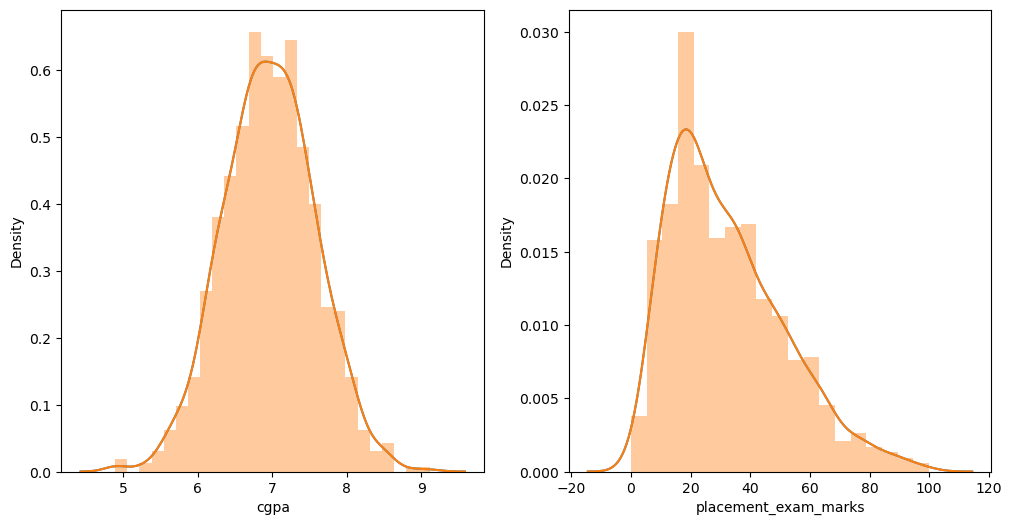

In [3]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,6))
sns.kdeplot(df['cgpa'], ax=ax[0])
sns.distplot(df['cgpa'], ax=ax[0])
sns.kdeplot(df['placement_exam_marks'], ax=ax[1])
sns.distplot(df['placement_exam_marks'], ax=ax[1])
plt.show()


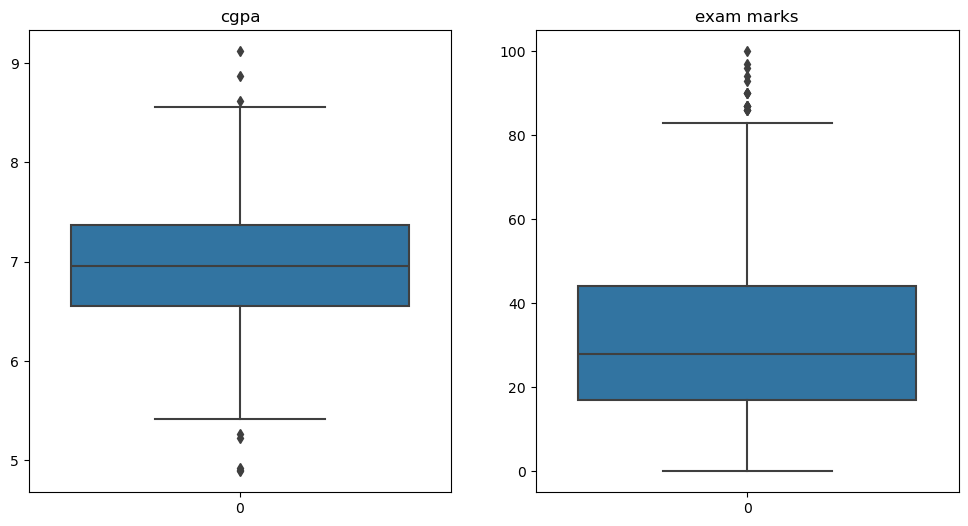

In [4]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,6))
sns.boxplot(df['cgpa'], ax=ax[0])
ax[0].set_title('cgpa')
sns.boxplot(df['placement_exam_marks'], ax=ax[1])
ax[1].set_title('exam marks')
plt.show()

In [5]:
cgpa = df[['cgpa']]
cgpa.head()

,cgpa
0,7.19
1,7.46
2,7.54
3,6.42
4,7.23


In [6]:
cgpa.describe()

,cgpa
count,1000.000000
mean,6.961240
std,0.615898
min,4.890000
25%,6.550000
50%,6.960000
75%,7.370000
max,9.120000


In [7]:
cgpa_mean = cgpa.mean().round(2)
cgpa_std = cgpa.std().round(2)

In [9]:
cgpa_mean - (3*cgpa_std)

cgpa    5.1
dtype: float64

In [10]:
cgpa_mean + (3*cgpa_std)

cgpa    8.82
dtype: float64

In [24]:
cgpa2 = (cgpa - cgpa_mean) / cgpa_std

In [25]:
cgpa2 

,cgpa
0,0.370968
1,0.806452
2,0.935484
3,-0.870968
4,0.435484
...,...
995,3.080645
996,3.483871
997,-3.338710
998,2.677419


In [28]:
cgpa2= cgpa2[ (cgpa2['cgpa'] > -3) & ( cgpa2['cgpa'] < 3 ) ]

<Axes: >

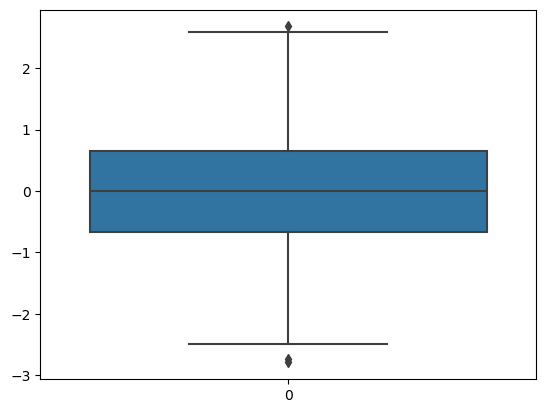

In [29]:
sns.boxplot(cgpa2['cgpa'])

In [17]:
cgpa2.describe()

,cgpa
count,995.000000
mean,0.005414
std,0.967874
min,-2.790323
25%,-0.661290
50%,0.000000
75%,0.653226
max,2.677419
